<h1>
Text Classification Project
</h1>
<h2>-------------------Spam or Ham?----------------</h2>

<h4>
Author: Tanaya Pole
</h4>
<br>



In [1]:
# Basic Libraries used. More will be added
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h5> One of the last graphs require a plotly API key. You are welcome to use mine.</h5>

In [2]:
#sign-in to plotly

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('Astrothug','3xrFT3fTSITlTxkztNcy') #plotly API key
print(plotly.__version__) #plotly version
plotly.offline.init_notebook_mode() #run at the start

2.2.2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
# Making the columns wider to see more of the message column
pd.set_option('max_colwidth',90)

In [4]:
# Read in the data
df = pd.read_excel('spam.xlsx')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Ci...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 t...,NaN,NaN,NaN


In [5]:
#Drop the columns with NaN 
#Renaming the columns to something more Descriptive 
df = df.dropna(axis=1)
df = df.rename(columns = {'v1':'label', 'v2': 'message'})
df.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Ci..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 t...


In [6]:
# Function that removes all punctuations from the messages
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [7]:
# Setting the messages column to string data type and implementing the remove_punctuations
df['message'] = df['message'].astype(str)
df['message'] = df['message'].apply(remove_punctuations)

In [8]:
# The amount of messages in the data that are Spam and ham.
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<br>
<h2>
Simple PieChart Displaying the amount of Spam and Ham Mesages
</h2>

In [9]:
# Build a small data frame to plot this piechart. 
data = [747,4825]
label_df = pd.DataFrame(data,columns=['Amount'], index=['Spam', 'Ham'])

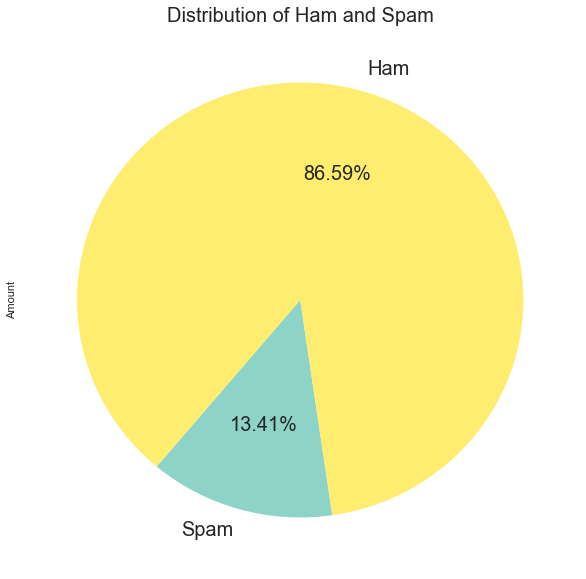

In [10]:
label_df['Amount'].plot.pie(subplots=True, colormap='Set3', autopct='%.2f%%',startangle=230, fontsize=20, figsize=(10,10),legend=False)
plt.title('Distribution of Ham and Spam', fontsize=20)
plt.show()

In [11]:
#Turning the labels into numerical values using label encoder function.
#Making a new Column with these values and naming the column 'y'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#y that will be used in training the data
y = le.fit_transform(df['label'].values)
df['y'] = pd.Series(y)


# rearrange the columns to our liking
cols=['label', 'y', 'message']
df = df[cols]


# setting X (might not use it)
X = df['message'].values
df.head()

#Adding messages length to the dataframe
df['msg_length'] = df['message'].str.len()

In [12]:
# Checking to see if everything is correct
df.head()

,label,y,message,msg_length
0,ham,0,Go until jurong point crazy Available only in bugis n great world la e buffet Cine the...,102
1,ham,0,Ok lar Joking wif u oni,23
2,spam,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to...,149
3,ham,0,U dun say so early hor U c already then say,43
4,ham,0,Nah I dont think he goes to usf he lives around here though,59


In [13]:
# Created two dataframes to use for the word cloud and graph the density graph
ham_df = df.loc[df['label'].isin(['ham'])]
spam_df=df.loc[df['label'].isin(['spam'])]

<h2>
Word Clouds Visuals
</h2>
<p align="center"> Show the most common words for each label. The more common words are larger.</p>

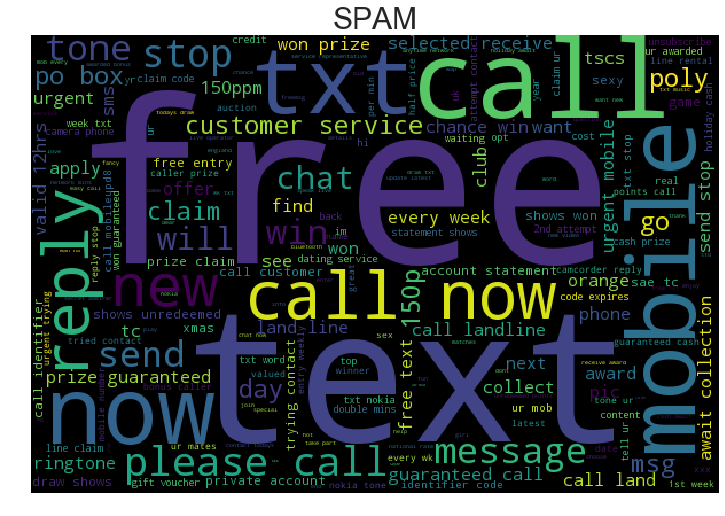

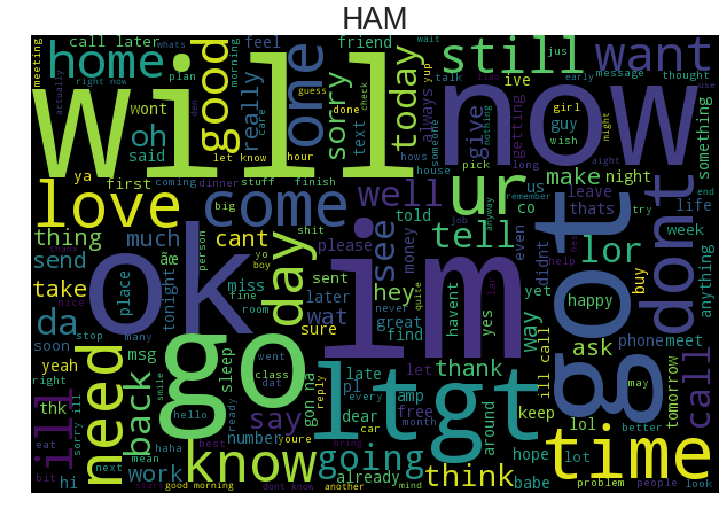

In [14]:
#World Cloud

import nltk
import wordcloud
from nltk.corpus import stopwords
ham_words = ''
spam_words = ''

for val in spam_df.message:
    message = val.lower()
    tokens = nltk.word_tokenize(message)
    for words in tokens:
        spam_words = spam_words + words + ' '

for val in ham_df.message:
    message = val.lower()
    tokens = nltk.word_tokenize(message)
    for words in tokens:
        ham_words = ham_words + words + ' '        
        
from wordcloud import WordCloud
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.title("SPAM", fontsize=30)
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Ham Word Cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.title("HAM", fontsize=30)
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<h2 align="center">
Density graph of Messages by label
</h2>

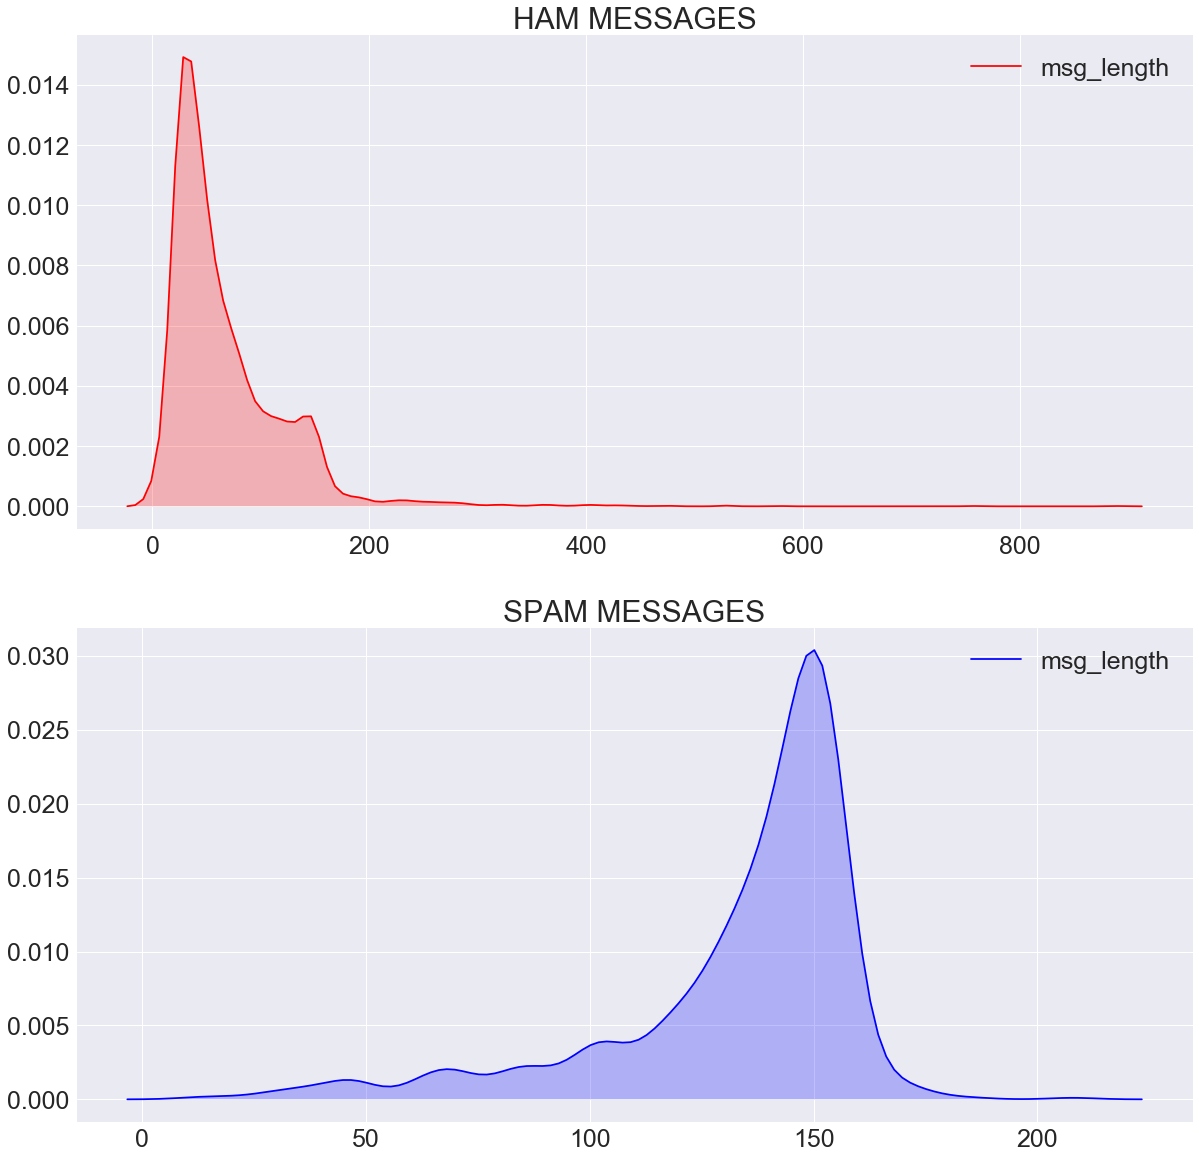

In [15]:
# Plot of 2 variables
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
p1=sns.kdeplot(ham_df['msg_length'], shade=True, color="r")
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
plt.legend(fontsize = 25)
plt.title('HAM MESSAGES',fontsize = 30)

plt.subplot(2, 1, 2)
p1=sns.kdeplot(spam_df['msg_length'], shade=True, color="b")
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
plt.legend(fontsize = 25)
plt.title('SPAM MESSAGES',fontsize = 30)
plt.show()

In [16]:
# Calling both feature extraction.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(stop_words='english')
tfv = TfidfVectorizer(stop_words='english')

In [17]:
# Splitting Data
# Notice y is stratified to make sure the amount of labels are balance between train and test
X_train,X_test,y_train,y_test = train_test_split(df['message'], y, test_size = 0.3, random_state = 0, stratify=y)

In [18]:
# Used both Count Vectorizer and TFID Vectorizer to see which one will produce better results.
# I believe the TFID Vectorizer will produce better results because it takes the frequency of the words and
# weights less on the common words
X_traincv = cv.fit_transform(X_train)
X_trainfv = tfv.fit_transform(X_train)

In [19]:
X_testcv = cv.transform(X_test)
X_testfv = tfv.transform(X_test)

In [20]:
# Import the multinomial Naive Bayes algorithm
from sklearn.naive_bayes import MultinomialNB
mnb_cv = MultinomialNB()
mnb_tfv = MultinomialNB()

In [21]:
# Apply the multinomial Naive Bayes algorithm
mnb_cv.fit(X_traincv, y_train)
mnb_tfv.fit(X_trainfv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
# Predicting the data
pred_cv = mnb_cv.predict(X_testcv)
pred_tfv = mnb_tfv.predict(X_testfv)
actual = np.asanyarray(y_test)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy Score with count vectorizer:', accuracy_score(y_test,pred_cv))

Accuracy Score with count vectorizer: 0.978468899522


In [24]:
print('Accuracy Score with Tfid vectorizer:', accuracy_score(y_test,pred_tfv))

Accuracy Score with Tfid vectorizer: 0.962320574163


<br><br>
<h4>
The Count Vectorizer has a better predicting accuracy than TFID. I decided to check how it effects the other of the models.
</h4>

In [25]:
# Importing the models I will use to compare
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Defining the models
svc = SVC(kernel='rbf', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=21)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=0)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=0)

In [27]:
# Making two dictionaries of the classifier. The first for the count vec NB. The second for TFidVectorizer NB
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb_cv, 'DT': dtc, 'LR': lrc, 'RF': rfc}
clfs2 = {'SVC' : svc,'KN' : knc, 'NB': mnb_tfv, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [28]:
# Gets the scores for cv
pred_scores_cv = []
for k,v in clfs.items():
    v.fit(X_traincv, y_train)
    pred = v.predict(X_testcv)
    ac = accuracy_score(y_test,pred)
    pred_scores_cv.append((k, [ac]))

In [29]:
# Making the accuracy score to a dataframe
df_pred_score_cv = pd.DataFrame.from_items(pred_scores_cv,orient='index', columns=['Score CV'])
df_pred_score_cv

,Score CV
SVC,0.893541
KN,0.869617
NB,0.978469
DT,0.962321
LR,0.971292
RF,0.969498


In [30]:
# Gets the accuracy score of Tfid
pred_scores_fv = []
for k,v in clfs2.items():
    v.fit(X_trainfv, y_train)
    pred = v.predict(X_testfv)
    ac = accuracy_score(y_test,pred)
    pred_scores_fv.append((k, [ac]))

In [31]:
# Making the accuracy score to a dataframe
df_pred_score_fv = pd.DataFrame.from_items(pred_scores_fv,orient='index', columns=['Score TFID'])

# Concating the data frames to a single data frame
df_pred_score = pd.concat([df_pred_score_cv, df_pred_score_fv], axis=1)
df_pred_score

,Score CV,Score TFID
SVC,0.893541,0.971890
KN,0.869617,0.866627
NB,0.978469,0.962321
DT,0.962321,0.950957
LR,0.971292,0.952751
RF,0.969498,0.970096


In [32]:
df_pred_score = df_pred_score.sort_values('Score CV', ascending=False)
df_pred_score = df_pred_score.round(3)

In [33]:
df_pred_score.index

Index(['NB', 'LR', 'RF', 'DT', 'SVC', 'KN'], dtype='object')

<br><h5>Using plotly to plot the accuracies of the models with CV and TFID</h5>

In [34]:
# x = ['SVC','KNN','Naive Bayes','Decision Tree','Logistic reg','Random forest']
x = ['Naive Bayes','Logistic reg','Random forest','Decision Tree','SVC','KNN']

# y1 = [0.89354,0.86961 ,0.97787,0.95634,0.97129,0.97129]
# y2 = [0.97189,0.86662 ,0.96232,0.95095,0.95275,0.97129]

# x = df_pred_score.index
y1 = df_pred_score['Score CV'].values
y2 = df_pred_score['Score TFID'].values

xcoord = [0,1,2,3,4,5]

annotations1 = [dict(
            x=xi-0.2,
            y=yi,
            text=str(yi),
            xanchor='auto',
            yanchor='bottom',
            showarrow=False,
        ) for xi, yi in zip(xcoord, y1)]

annotations2 = [dict(
            x=xi+0.2,
            y=yi,
            text=str(yi),
            xanchor='auto',
            yanchor='bottom',
            showarrow=False,
        ) for xi, yi in zip(xcoord, y2)]

annotations = annotations1 + annotations2
trace1 = go.Bar(
    x=x,
    y=y1,
    name='Score CV'
)
trace2 = go.Bar(
    x=x,
    y=y2,
    name='Score TFID'
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    annotations=annotations,
    title = 'Comparison of scores by using CV and TFID methods'
)
fig = go.Figure(data=data, layout=layout)

plotly.plotly.iplot(fig)

<h2> Confusion Matrices for the Models Using the Count Vectorizer</h2>

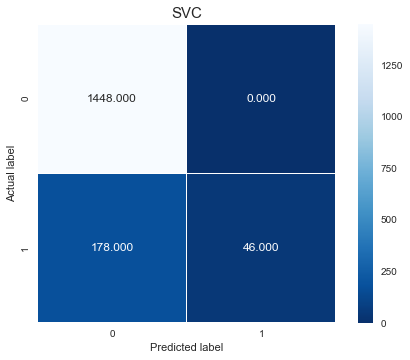

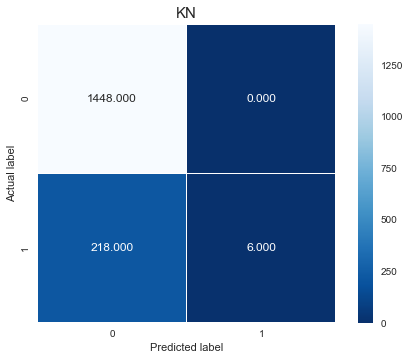

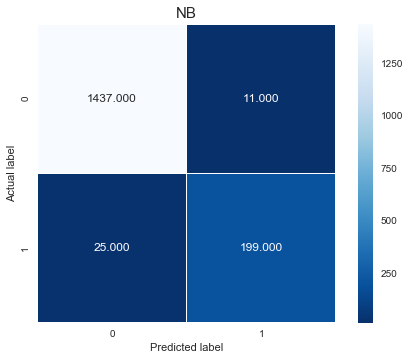

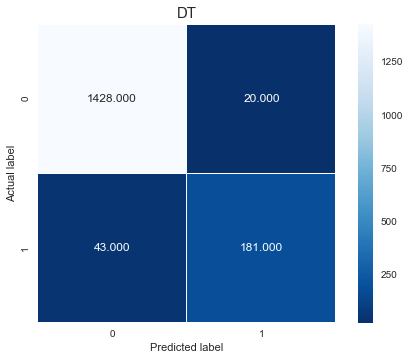

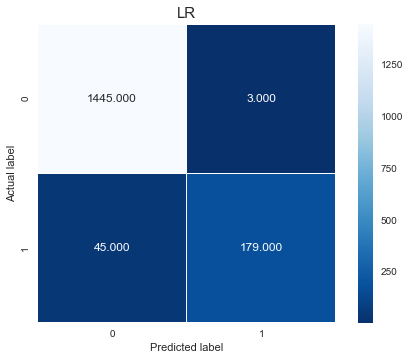

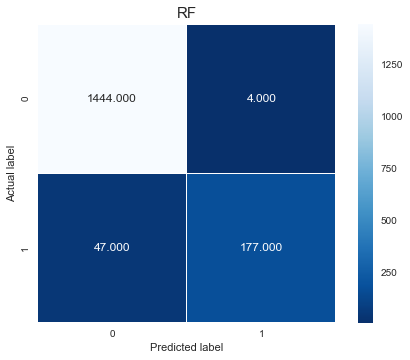

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
for k,v in clfs.items():
    v.fit(X_traincv, y_train)
    pred = v.predict(X_testcv)
    ac = accuracy_score(y_test,pred)
    cm = metrics.confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(k, size = 15);
    plt.show()    

<br><br>
<h2>Do n-gram of size 3 or 4 yield better accuracy results for the classifiers?</h2>

<p> 
On page 261 of Sabastian Raschka's book, state that n-gram sizes of 3 and 4 may yield better performance in a antispam filter.
</p> 
<p>
Lets see if this is true. I will try with countvectorizer
</p>

In [36]:
# Setting different ngram_ranges.
# Note: cv with unIgram was defined earlier.
cv2 = CountVectorizer(stop_words='english', ngram_range=(2,2))
cv3 = CountVectorizer(stop_words='english', ngram_range=(3,3))
cv4 = CountVectorizer(stop_words='english', ngram_range=(4,4))
cv5 = CountVectorizer(stop_words='english', ngram_range=(5,5))
cv6 = CountVectorizer(stop_words='english', ngram_range=(6,6))

In [37]:
# Turning data into numerical
X_traincv = cv.fit_transform(X_train)
X_traincv2 = cv2.fit_transform(X_train)
X_traincv3 = cv3.fit_transform(X_train)
X_traincv4 = cv4.fit_transform(X_train)
X_traincv5 = cv5.fit_transform(X_train)
X_traincv6 = cv6.fit_transform(X_train)

X_testcv = cv.transform(X_test)
X_testcv2 = cv2.transform(X_test)
X_testcv3 = cv3.transform(X_test)
X_testcv4 = cv4.transform(X_test)
X_testcv5 = cv5.transform(X_test)
X_testcv6 = cv6.transform(X_test)


In [38]:
mnb = MultinomialNB()

In [39]:
# It takes a couple of seconds for the function below to run everytime it is used.
# I used a progress bar from pyprind package to fill while the function is being runned. 
import pyprind

def clfs_scores(tempList, X_train, X_test, colName):
    clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}
    tempList = []
    pbar = pyprind.ProgBar(6)
    for k,v in clfs.items():
        v.fit(X_train, y_train)
        pred = v.predict(X_test)
        ac = accuracy_score(y_test,pred)
        tempList.append((k, [ac]))
        pbar.update()
    df = pd.DataFrame.from_items(tempList,orient='index', columns=[colName])
    return df
        

In [40]:
def concatDf(df1,df2):
    df = pd.concat([df1, df2], axis=1)
    return df

In [41]:
ngram=[]
n_df = clfs_scores(ngram, X_traincv, X_testcv, 'unigram Scores')
n_df

0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


,unigram Scores
SVC,0.893541
KN,0.869617
NB,0.978469
DT,0.962321
LR,0.971890
RF,0.969498


In [42]:
n2gram=[]
n2_df = clfs_scores(n2gram, X_traincv2, X_testcv2, '2gram Scores')
total_df = concatDf(n_df, n2_df)
total_df

0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


,unigram Scores,2gram Scores
SVC,0.893541,0.893541
KN,0.869617,0.866029
NB,0.978469,0.969498
DT,0.962321,0.953947
LR,0.971890,0.941388
RF,0.969498,0.943780


In [43]:
n3gram=[]
n3_df = clfs_scores(n3gram, X_traincv3, X_testcv3, '3gram Scores')
total_df = concatDf(total_df, n3_df)
total_df

0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


,unigram Scores,2gram Scores,3gram Scores
SVC,0.893541,0.893541,0.894737
KN,0.869617,0.866029,0.866029
NB,0.978469,0.969498,0.941388
DT,0.962321,0.953947,0.930024
LR,0.971890,0.941388,0.906100
RF,0.969498,0.943780,0.925837


In [44]:
n4gram=[]
n4_df = clfs_scores(n4gram, X_traincv4, X_testcv4, '4gram Scores')
total_df = concatDf(total_df, n4_df)
total_df

0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:05


,unigram Scores,2gram Scores,3gram Scores,4gram Scores
SVC,0.893541,0.893541,0.894737,0.894737
KN,0.869617,0.866029,0.866029,0.866029
NB,0.978469,0.969498,0.941388,0.933014
DT,0.962321,0.953947,0.930024,0.924043
LR,0.971890,0.941388,0.906100,0.904306
RF,0.969498,0.943780,0.925837,0.915670


In [45]:
n5gram=[]
n5_df = clfs_scores(n5gram, X_traincv5, X_testcv5, '5gram Scores')
total_df = concatDf(total_df, n5_df)
total_df

0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:04


,unigram Scores,2gram Scores,3gram Scores,4gram Scores,5gram Scores
SVC,0.893541,0.893541,0.894737,0.894737,0.894737
KN,0.869617,0.866029,0.866029,0.866029,0.866029
NB,0.978469,0.969498,0.941388,0.933014,0.928828
DT,0.962321,0.953947,0.930024,0.924043,0.915072
LR,0.971890,0.941388,0.906100,0.904306,0.892344
RF,0.969498,0.943780,0.925837,0.915670,0.909091


In [46]:
n6gram=[]
n6_df = clfs_scores(n6gram, X_traincv6, X_testcv6, '6gram Scores')
total_df = concatDf(total_df, n6_df)
total_df

0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:03


,unigram Scores,2gram Scores,3gram Scores,4gram Scores,5gram Scores,6gram Scores
SVC,0.893541,0.893541,0.894737,0.894737,0.894737,0.894737
KN,0.869617,0.866029,0.866029,0.866029,0.866029,0.866029
NB,0.978469,0.969498,0.941388,0.933014,0.928828,0.919258
DT,0.962321,0.953947,0.930024,0.924043,0.915072,0.915670
LR,0.971890,0.941388,0.906100,0.904306,0.892344,0.885766
RF,0.969498,0.943780,0.925837,0.915670,0.909091,0.906100


In [47]:
total_df = total_df.round(3)
total_df = total_df.sort_values('unigram Scores', ascending=False)

In [48]:

total_df

,unigram Scores,2gram Scores,3gram Scores,4gram Scores,5gram Scores,6gram Scores
NB,0.978,0.969,0.941,0.933,0.929,0.919
LR,0.972,0.941,0.906,0.904,0.892,0.886
RF,0.969,0.944,0.926,0.916,0.909,0.906
DT,0.962,0.954,0.930,0.924,0.915,0.916
SVC,0.894,0.894,0.895,0.895,0.895,0.895
KN,0.870,0.866,0.866,0.866,0.866,0.866


<h3>
Bar Plot to display the accuracy score difference as n_gram_range increase per classifier
</h3>

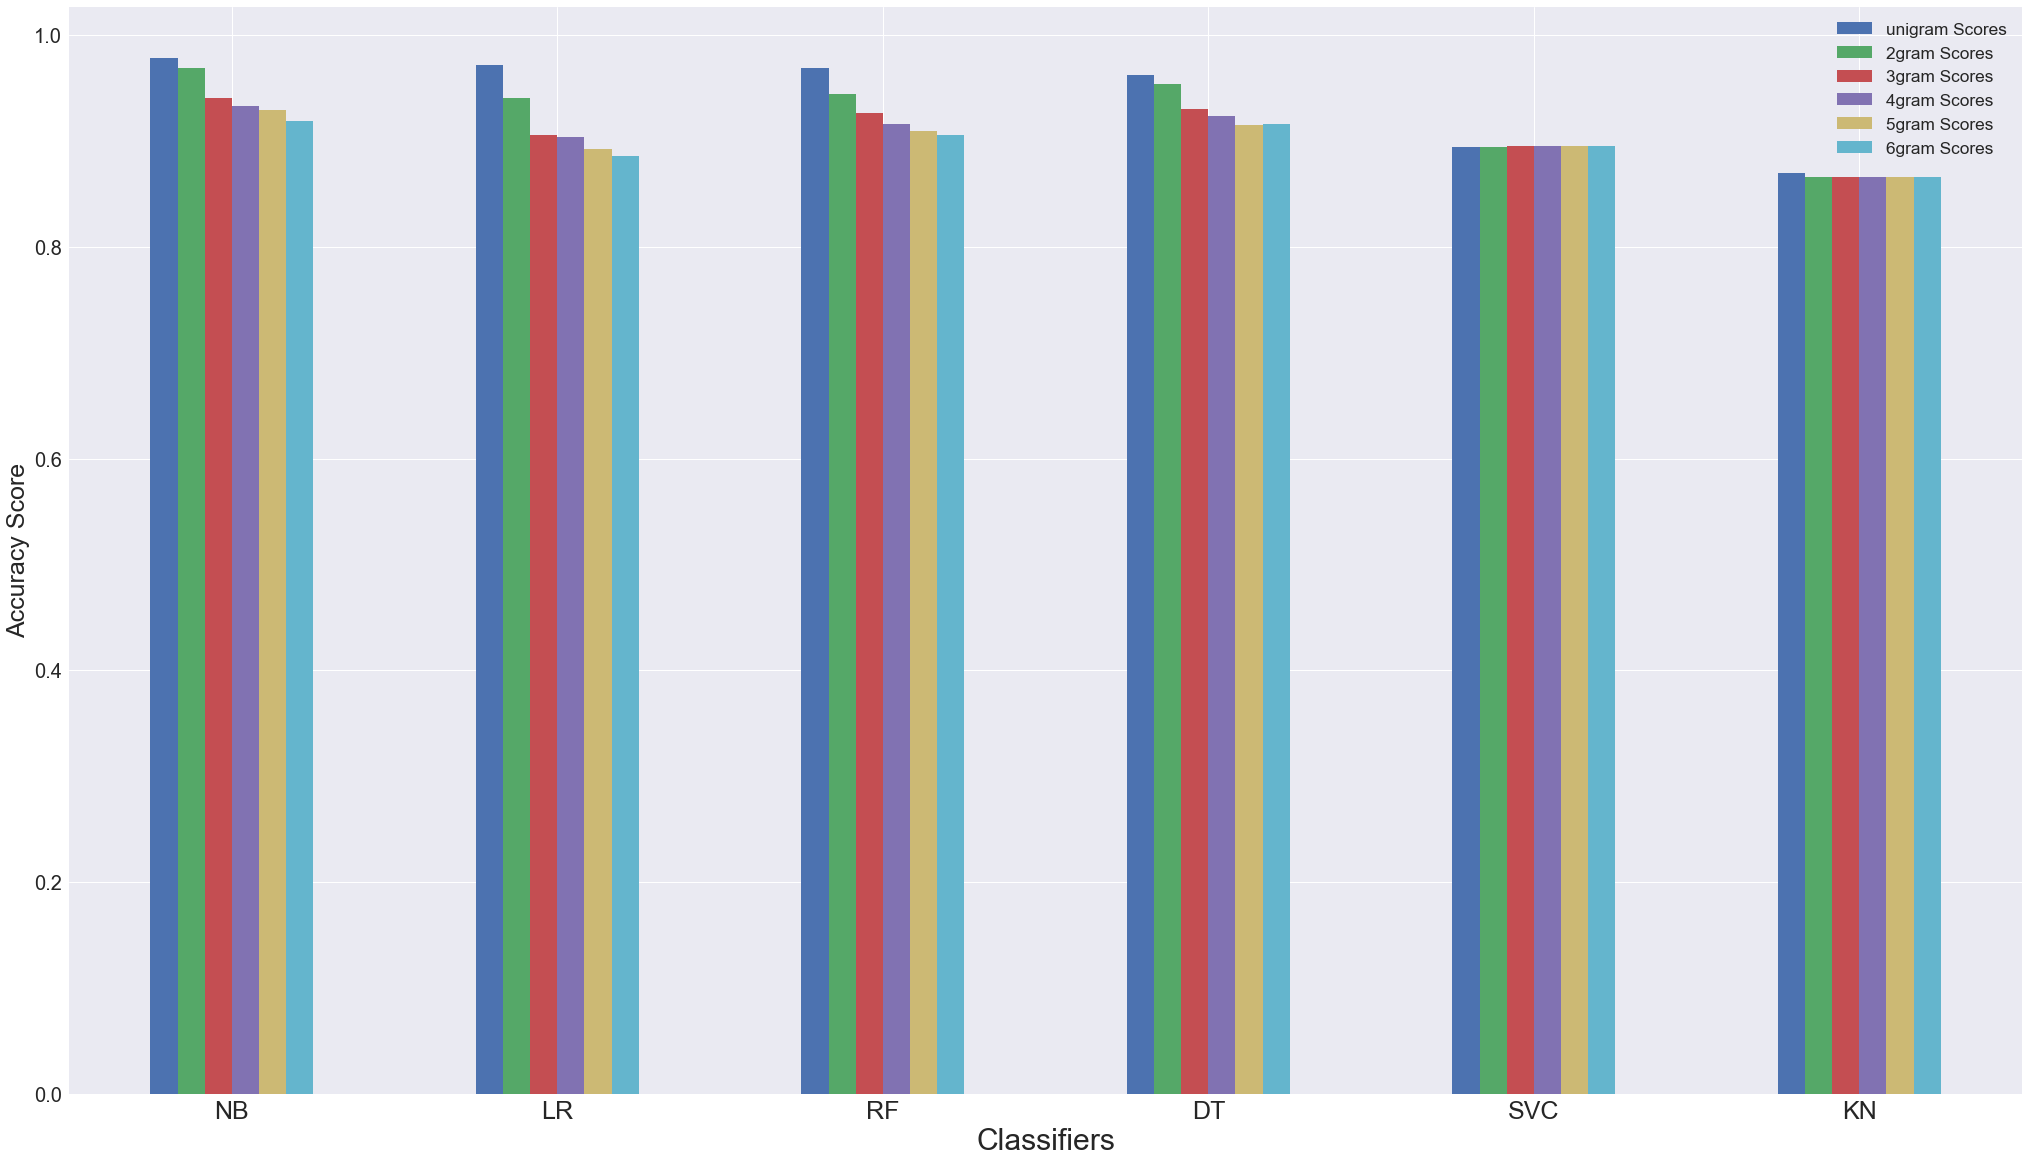

In [49]:
gramSize_barPlot = total_df.plot.bar(figsize=(35, 20), rot=360,fontsize=12)
gramSize_barPlot.set_xlabel('Classifiers', fontsize=30)
gramSize_barPlot.set_ylabel('Accuracy Score', fontsize=25)
gramSize_barPlot.legend(loc=1, fontsize = 'x-large')
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.show()

<h3>
To get the best accuracy score, I have to implement the Countvectorizer to the multinomial Navie Bayes classifier using a unigram model.
</h3>